<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Demo:-Linear-hard-margin-SVM" data-toc-modified-id="Demo:-Linear-hard-margin-SVM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demo: Linear hard-margin SVM</a></span><ul class="toc-item"><li><span><a href="#Generating-test-data" data-toc-modified-id="Generating-test-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generating test data</a></span></li><li><span><a href="#Building-our-own-classifier" data-toc-modified-id="Building-our-own-classifier-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Building our own classifier</a></span><ul class="toc-item"><li><span><a href="#Training-the-classifier" data-toc-modified-id="Training-the-classifier-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Training the classifier</a></span></li><li><span><a href="#Classification-result" data-toc-modified-id="Classification-result-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Classification result</a></span></li></ul></li><li><span><a href="#But-what-about-non-linearly-separable-data?" data-toc-modified-id="But-what-about-non-linearly-separable-data?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>But what about non-linearly-separable data?</a></span></li></ul></li><li><span><a href="#Soft-Margin" data-toc-modified-id="Soft-Margin-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soft Margin</a></span><ul class="toc-item"><li><span><a href="#Iris-data-classification" data-toc-modified-id="Iris-data-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iris data classification</a></span><ul class="toc-item"><li><span><a href="#Prediction-of-Versicolar-Dataset" data-toc-modified-id="Prediction-of-Versicolar-Dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prediction of Versicolar Dataset</a></span></li><li><span><a href="#Prediction-of-Setosa-Dataset" data-toc-modified-id="Prediction-of-Setosa-Dataset-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Prediction of Setosa Dataset</a></span></li></ul></li><li><span><a href="#Math-Testing" data-toc-modified-id="Math-Testing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Math Testing</a></span></li></ul></li></ul></div>

# Demo: Linear hard-margin SVM

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Generating test data

In [251]:
nsamples = 200
salmon = np.random.multivariate_normal([3,18],0.2*np.array([[3.25,-2.25],[-2.25,9.25]]),nsamples)
seabass = np.random.multivariate_normal([14.5,19], 0.1*np.array([[9.5625,1.3125],[1.3125,6.0625]]),nsamples)
X = np.concatenate((salmon,seabass))
y = [1]*nsamples + [-1]*nsamples

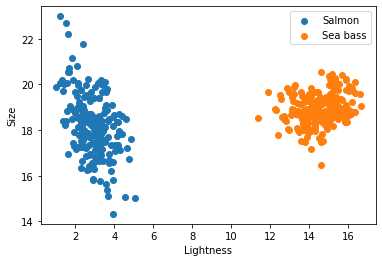

In [252]:
plt.scatter(salmon[:,0],salmon[:,1])
plt.scatter(seabass[:,0],seabass[:,1])
plt.legend(["Salmon","Sea bass"])
plt.xlabel("Lightness")
plt.ylabel("Size")
plt.show()

In [253]:
print("Size of training data points: ", np.shape(X))
print("Size of training data labels: ", np.shape(y))

Size of training data points:  (400, 2)
Size of training data labels:  (400,)


## Building our own classifier

In [254]:
import qpsolvers
import numpy.matlib

In [255]:
def train_hard_svm(X,y):
    # dimensions of the training data
    nsamples = np.shape(X)[0]
    ndims = np.shape(X)[1]
    
    # constructing the quadratic cost matrix
    P = np.zeros((ndims+1,ndims+1))
    P[0:ndims,0:ndims] = np.eye(ndims)
    P = P + np.eye(ndims+1)*1e-3
    
    # constructing the quadratic cost vector
    q = np.zeros(ndims+1)
    
    # constructing the linear inequality matrix
    G = np.zeros((nsamples,ndims+1))
    G[:,0:ndims] = np.multiply(np.array(np.matlib.repmat(y,ndims,1)).T,X)
    G[:,ndims] = y 
    G = -G
    
    # constructing the linear inequality vector
    h = -np.ones((nsamples,1))[:,0]
    
    # solving the quadratic optimization problem
    z = qpsolvers.solve_qp(P, q, G, h)
    
    w = z[0:ndims]
    b = z[ndims]
    
    return w, b

def classify(w,b,X):
    nsamples = np.shape(X)[0]
    ndims = np.shape(X)[1]
    
    # signed distance
    r = np.matmul(w,X.T) + b
    
    return r/abs(r)

### Training the classifier

In [256]:
w,b = train_hard_svm(X,y)

In [257]:
print("Classification hyperplane defined by")
print("w: ", w)
print("b: ", b)

Classification hyperplane defined by
w:  [-0.30498047 -0.02247579]
b:  2.8789238210524006


### Classification result

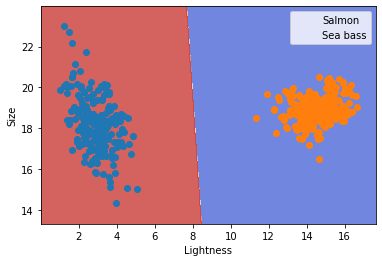

In [258]:
# construct a grid
h=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# classify grid points
Z = classify(w, b, np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(salmon[:,0],salmon[:,1])
plt.scatter(seabass[:,0],seabass[:,1])
plt.legend(["Salmon","Sea bass"])
plt.xlabel("Lightness")
plt.ylabel("Size")
plt.show()

## But what about non-linearly-separable data?

In [259]:
nsamples = 200
salmon = np.random.multivariate_normal([3,18],0.2*np.array([[3.25,-2.25],[-2.25,9.25]]),nsamples)
seabass = np.random.multivariate_normal([5.5,19], 0.1*np.array([[9.5625,1.3125],[1.3125,6.0625]]),nsamples)
X = np.concatenate((salmon,seabass))
y = [1]*nsamples + [-1]*nsamples

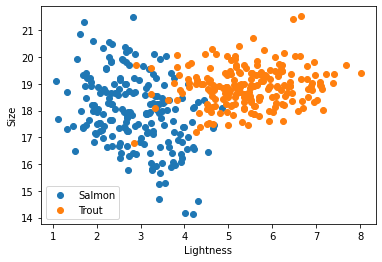

In [471]:
plt.scatter(salmon[:,0],salmon[:,1])
plt.scatter(seabass[:,0],seabass[:,1])
plt.legend(["Salmon","Trout"])
plt.xlabel("Lightness")
plt.ylabel("Size")
plt.show()

# Soft Margin

Definition of SVM class implementing the soft-margin SVM

In [532]:
class mySVM(object):
    def __init__(self, C=1.0):
        self.C = C
        if self.C is not None:
            self.C = float(self.C)

    def fit(self, X, y):
        # dimensions of the training data
        nsamples = np.shape(X)[0]
        ndims = np.shape(X)[1]

        # constructing the quadratic cost matrix
        P = np.zeros((ndims+1+nsamples, ndims+1+nsamples))
        P[0:ndims, 0:ndims] = np.eye(ndims)
        # make P pos definite
        P = P + np.eye(ndims+nsamples+1)*1e-3

        # constructing the quadratic cost vector
        q = np.zeros(ndims+nsamples+1)
        q[ndims+1:] = self.C

        # constructing the linear inequality matrix
        G = np.zeros((nsamples*2, ndims+1+nsamples))

        # Outer Product
        K = np.array(y)[:, np.newaxis]*X

        # Add K at the top lefty*<w
        G[0:nsamples, 0:ndims] = K
        # One Column for y (multiplied with b)
        G[:nsamples, ndims] = y
        G[:nsamples, ndims+1:] = np.eye(nsamples)
        G[nsamples:, ndims+1:] = np.eye(nsamples)
        G = -G

        # constructing the linear inequality vector
        h = np.zeros(nsamples*2)
        h[:nsamples] = -np.ones((nsamples, 1))[:, 0]

        # solving the quadratic optimization problem
        z = qpsolvers.solve_qp(P, q, G, h)

        self.w = z[0:ndims]
        self.b = z[ndims:ndims+1]
        self.xi = z[ndims+1:]
        
        return self.w,self.b

    def predict(self,X):
        nsamples = np.shape(X)[0]
        ndims = np.shape(X)[1]

        # signed distance
        r = np.matmul(self.w, X.T) + self.b

        return r/abs(r)

In [533]:
svm = mySVM(C=2.0)
w_soft, b_soft = svm.fit(X,y)

In [534]:
print("Classification hyperplane defined by")
print("w: ", w_soft)
print("b: ", b_soft)

Classification hyperplane defined by
w:  [-2.12619283 -0.72539663]
b:  [21.96975347]


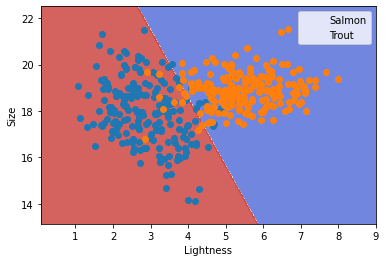

In [479]:
# construct a grid
h=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# classify grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(salmon[:,0],salmon[:,1])
plt.scatter(seabass[:,0],seabass[:,1])
plt.legend(["Salmon","Trout"])
plt.xlabel("Lightness")
plt.ylabel("Size")
plt.show()

## Iris data classification

In [481]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics
iris = datasets.load_iris()

In [496]:
def printMetrics(y_test,y_pred):
    print("Acc: ", sklearn.metrics.accuracy_score(y_test,y_pred))
    print("Prec: ",sklearn.metrics.precision_score(y_test,y_pred))
    print("Rec: ", sklearn.metrics.recall_score(y_test,y_pred))

In [497]:
data = iris.data
target = iris.target

In [498]:
target_setosa = np.full(target.shape,-1)
target_versicolor = np.full(target.shape,-1)
target_setosa[target == 0] = 1
target_versicolor[target == 1] = 1

In [499]:
X_train_set,X_test_set,y_train_set,y_test_set = train_test_split(data,target_setosa,test_size=0.2, random_state=42)
X_train_ver,X_test_ver,y_train_ver,y_test_ver = train_test_split(data,target_versicolor,test_size=0.2, random_state=42)

### Prediction of Versicolar Dataset

In [525]:
svm2 = mySVM(C=2.0)
w_set,b_set = svm2.fit(X_train_ver,y_train_ver)
y_pred = svm2.predict(X_test_ver)
printMetrics(y_test_ver,y_pred)

Acc:  0.8333333333333334
Prec:  0.75
Rec:  0.6666666666666666


Comparison with sklearn SVM implementation

In [535]:
from sklearn.svm import SVC
svc = SVC(C=2.0, kernel='linear')
svc.fit(X_train_ver,y_train_ver)
y_pred_orig_svm = svc.predict(X_test_ver)
printMetrics(y_test_ver,y_pred_orig_svm)

Acc:  0.8333333333333334
Prec:  0.75
Rec:  0.6666666666666666


### Prediction of Setosa Dataset

In [536]:
svm2 = mySVM(C=2.0)
w_set,b_set = svm2.fit(X_train_set,y_train_set)
y_pred = svm2.predict(X_test_set)
printMetrics(y_test_set,y_pred)

Acc:  1.0
Prec:  1.0
Rec:  1.0


Comparison with sklearn Implementation

In [537]:
svc = SVC(C=2.0, kernel='linear')
svc.fit(X_train_set,y_train_set)
y_pred_orig_svm = svc.predict(X_test_set)
printMetrics(y_test_set,y_pred_orig_svm)

Acc:  1.0
Prec:  1.0
Rec:  1.0


## Math Testing

Multiply the scalar y_n with vector x_n

In [616]:
x_ = np.array([[4,2,3],[1,1,4]])
y_ = np.array([-1,1])
yx_ = y_[:,np.newaxis] * x_

w: has as much entries as x has features (every feature is weighted)

In [639]:
w_ = np.array([[1,0,1]])

In [640]:
w_

array([[1, 0, 1]])

x: In this case has three features and two samples

In [641]:
x_

array([[4, 2, 3],
       [1, 1, 4]])

y*x for all y from y_1 to y_n and all x x_1 to x_n is multiplied row wise

In [642]:
yx_

array([[-4, -2, -3],
       [ 1,  1,  4]])

yx (the "G" Matrix without b vector and slack xi) here, is multiplied with w to get as many equations as samples (Two in this case)

In [635]:
yx_*w_

array([[-4,  0, -3],
       [ 1,  0,  4]])